In [281]:
from scipy.io import wavfile
import numpy as np
import sklearn.linear_model
import os
import matplotlib.pyplot as plt
from numpy import fft


In [282]:
sample_length = 44101

root = 'chord_dataset'
exts = os.listdir(root)
data = np.zeros([len(exts) , sample_length])
labels = list(range(len(data)))

for i,ex in enumerate(exts):
    _ , x = wavfile.read(f'{root}/{ex}')
    data[i,:] = x
    
data = data/32768

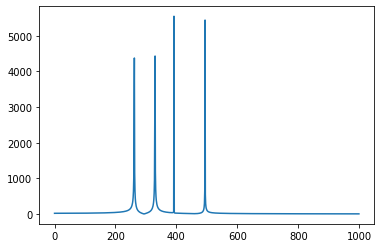

In [473]:
# Maybe we will try to transform the data
# data = data + np.random.randn(data.shape[0],data.shape[1])*200

def f_feat(x):
    x = fft.rfft(x)
    if len(x.shape) == 1:
        x = x[0:1000]
    else:
        x = x[:,0:1000]
    x = np.abs(x)
    
    return x

# def f_feat(x):
#     x = fft.rfft(x)
#     if len(x.shape) == 1:
#         x = x[0:1000]
#     else:
#         x = x[:,0:1000]
#     r = np.real(x)
#     i = np.imag(x)
#     x = np.hstack([r,i])
    
#     return r


fdata = f_feat(data)    
# fdata = fft.rfft(np.roll(data + np.random.randn(data.shape[0],data.shape[1]),8000, axis = 1))
# fdata = fdata[:,0:1000] # Only need frequencies up to 1000
# fdata = np.abs(fdata)

plt.plot(fdata[11,:])
plt.show()



In [474]:
model = sklearn.linear_model.LogisticRegression()
model.fit(fdata,labels)
model.score(fdata,labels)

/Users/nm/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [475]:
# to_predict = data[2,:].reshape(1,-1) + 2*np.random.randn(1,sample_length)
idx = 1
roll_quantity = 44101 // 2
to_predict = f_feat(np.roll(data[idx,:],roll_quantity).reshape(1,-1) + 0*np.random.randn(data.shape[1]))
model.predict(to_predict)

array([1])

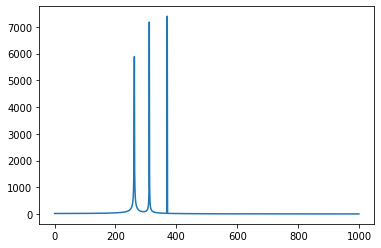

In [476]:
plt.plot(to_predict[0,:])
plt.show()

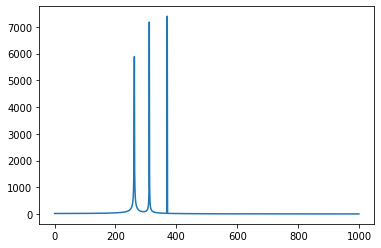

In [477]:
plt.plot(f_feat(data[idx,:]))
plt.show()

In [398]:
np.sum(100*f_feat(data[idx,:]) == f_feat(data[idx,:] * 100))


97

In [402]:
f_feat(data[idx,:]) * 100

array([3.37096558e+03, 3.43839524e+03, 3.43823901e+03, 3.43883050e+03,
       3.43902717e+03, 3.43930093e+03, 3.43968363e+03, 3.44053977e+03,
       3.44098420e+03, 3.44163987e+03, 3.44220001e+03, 3.44305004e+03,
       3.44402175e+03, 3.44494500e+03, 3.44589370e+03, 3.44695732e+03,
       3.44809477e+03, 3.44946885e+03, 3.45116215e+03, 3.45233323e+03,
       3.45359956e+03, 3.45517614e+03, 3.45701979e+03, 3.45888249e+03,
       3.46067544e+03, 3.46238410e+03, 3.46447386e+03, 3.46638626e+03,
       3.46850652e+03, 3.47074740e+03, 3.47312319e+03, 3.47546556e+03,
       3.47800745e+03, 3.48075495e+03, 3.48340838e+03, 3.48577328e+03,
       3.48877423e+03, 3.49161383e+03, 3.49469769e+03, 3.49775929e+03,
       3.50079428e+03, 3.50410926e+03, 3.50749499e+03, 3.51072842e+03,
       3.51433636e+03, 3.51779512e+03, 3.52153548e+03, 3.52523326e+03,
       3.52902865e+03, 3.53281968e+03, 3.53722675e+03, 3.54114819e+03,
       3.54547662e+03, 3.54966157e+03, 3.55392800e+03, 3.55834996e+03,
      

In [403]:
f_feat(data[idx,:] * 100)

array([3.37096558e+03, 3.43839524e+03, 3.43823901e+03, 3.43883050e+03,
       3.43902717e+03, 3.43930093e+03, 3.43968363e+03, 3.44053977e+03,
       3.44098420e+03, 3.44163987e+03, 3.44220001e+03, 3.44305004e+03,
       3.44402175e+03, 3.44494500e+03, 3.44589370e+03, 3.44695732e+03,
       3.44809477e+03, 3.44946885e+03, 3.45116215e+03, 3.45233323e+03,
       3.45359956e+03, 3.45517614e+03, 3.45701979e+03, 3.45888249e+03,
       3.46067544e+03, 3.46238410e+03, 3.46447386e+03, 3.46638626e+03,
       3.46850652e+03, 3.47074740e+03, 3.47312319e+03, 3.47546556e+03,
       3.47800745e+03, 3.48075495e+03, 3.48340838e+03, 3.48577328e+03,
       3.48877423e+03, 3.49161383e+03, 3.49469769e+03, 3.49775929e+03,
       3.50079428e+03, 3.50410926e+03, 3.50749499e+03, 3.51072842e+03,
       3.51433636e+03, 3.51779512e+03, 3.52153548e+03, 3.52523326e+03,
       3.52902865e+03, 3.53281968e+03, 3.53722675e+03, 3.54114819e+03,
       3.54547662e+03, 3.54966157e+03, 3.55392800e+03, 3.55834996e+03,
      

In [416]:
f_feat_stacked(data[idx,:]).shape

(2000,)